In [1]:
import xarray as xr
import rioxarray as xrio
import earthaccess
import boto3
import cartopy.crs as ccrs
import cartopy.feature as cfeature
import matplotlib.pyplot as plt
import warnings
from IPython.display import display, Markdown
import numpy as np

warnings.filterwarnings('ignore')
%matplotlib inline

In [2]:
import netCDF4

In [3]:
import boto3
s3_client = boto3.client('s3')
response = s3_client.list_buckets()
for bucket in response['Buckets']:
    print(bucket['Name'])

In [4]:
if (boto3.client('s3').meta.region_name == 'us-west-2'):
    display(Markdown('### us-west-2 Region Check: &#x2705;'))
else:
    display(Markdown('### us-west-2 Region Check: &#10060;'))
    raise ValueError('Your notebook is not running inside the AWS us-west-2 region, and will not be able to directly access NASA Earthdata S')

### us-west-2 Region Check: &#x2705;

In [5]:
# Authenticate using Earthdata Login prerequisite files
auth = earthaccess.login()

From GES-DISC web search (https://disc.gsfc.nasa.gov):

All data available from 1980 to Present

Need to Calculate PM2.5 from a formula

PM2.5 Hourly: C1276812830-GES_DISC, s3://gesdisc-cumulus-prod-protected/MERRA2/M2T1NXAER.5.12.4/

    - https://disc.gsfc.nasa.gov/datasets/M2T1NXAER_5.12.4/summary

PM2.5 Monthly : C1276812866-GES_DISC, s3://gesdisc-cumulus-prod-protected/MERRA2_MONTHLY/M2TMNXAER.5.12.4/

    - https://disc.gsfc.nasa.gov/datasets/M2TMNXAER_5.12.4/summary

PM2.5 Monthly (Hourly Average): C1276812869-GES_DISC, s3://gesdisc-cumulus-prod-protected/MERRA2_DIURNAL/M2TUNXAER.5.12.4/

    - https://disc.gsfc.nasa.gov/datasets/M2TUNXAER_5.12.4/summary

MERRA2_CNN_HAQAST bias corrected global hourly surface total PM2.5 mass concentration, V1 (MERRA2_CNN_HAQAST_PM25): C3094710982-GES_DISC, s3://gesdisc-cumulus-prod-protected/HAQAST/MERRA2_CNN_HAQAST_PM25.1/

    - https://disc.gsfc.nasa.gov/datasets/MERRA2_CNN_HAQAST_PM25_1/summary
    - 2000-01-01 to  2024-06-01

In [6]:
# Search for the granule by DOI
results = earthaccess.search_data(
 concept_id="C3094710982-GES_DISC", temporal=("2023-08-16", "2023-08-18"))

print(results[0])

[Collection: {'ShortName': 'MERRA2_CNN_HAQAST_PM25', 'Version': '1'}
Spatial coverage: {'HorizontalSpatialDomain': {'Geometry': {'BoundingRectangles': [{'WestBoundingCoordinate': -180.0, 'EastBoundingCoordinate': 179.375, 'NorthBoundingCoordinate': 90.0, 'SouthBoundingCoordinate': -90.0}]}}}
Temporal coverage: {'RangeDateTime': {'BeginningDateTime': '2023-08-16T00:00:00.000Z', 'EndingDateTime': '2023-08-16T23:59:59.000Z'}}
Size(MB): 11.814248085022
Data: ['https://data.gesdisc.earthdata.nasa.gov/data/HAQAST/MERRA2_CNN_HAQAST_PM25.1/2023/MERRA2_HAQAST_CNN_L4_V1.20230816.nc4'], Collection: {'ShortName': 'MERRA2_CNN_HAQAST_PM25', 'Version': '1'}
Spatial coverage: {'HorizontalSpatialDomain': {'Geometry': {'BoundingRectangles': [{'WestBoundingCoordinate': -180.0, 'EastBoundingCoordinate': 179.375, 'NorthBoundingCoordinate': 90.0, 'SouthBoundingCoordinate': -90.0}]}}}
Temporal coverage: {'RangeDateTime': {'BeginningDateTime': '2023-08-17T00:00:00.000Z', 'EndingDateTime': '2023-08-17T23:59:59

In [7]:
fn = earthaccess.open(results)

QUEUEING TASKS | :   0%|          | 0/3 [00:00<?, ?it/s]

PROCESSING TASKS | :   0%|          | 0/3 [00:00<?, ?it/s]

COLLECTING RESULTS | :   0%|          | 0/3 [00:00<?, ?it/s]

In [8]:
ds = xr.open_mfdataset(fn)

ValueError: found the following matches with the input file in xarray's IO backends: ['h5netcdf']. But their dependencies may not be installed, see:
https://docs.xarray.dev/en/stable/user-guide/io.html 
https://docs.xarray.dev/en/stable/getting-started-guide/installing.html

In [71]:
from pathlib import Path
Path.cwd()
files = earthaccess.download(results, Path.cwd() /'merra_data')

QUEUEING TASKS | :   0%|          | 0/3 [00:00<?, ?it/s]

PROCESSING TASKS | :   0%|          | 0/3 [00:00<?, ?it/s]

COLLECTING RESULTS | :   0%|          | 0/3 [00:00<?, ?it/s]

In [10]:
files[2]

'/var/home/rupertwilliams/Homes/gis/PyCharmProjects/GIS/Assignment 4/merra_data/MERRA2_HAQAST_CNN_L4_V1.20230818.nc4'

In [11]:
ds = xr.open_mfdataset([ Path.cwd() / file for file in files], combine= 'by_coords',engine='netcdf4', decode_coords='all')

In [12]:
type(ds)

xarray.core.dataset.Dataset

In [13]:
ds.rio.crs

In [14]:
ds.attrs

{'Comment': 'filename: MERRA2_HAQAST_CNN_L4_V1_20230816.nc4',
 'Filename': 'MERRA2_HAQAST_CNN_L4_V1_20230816.nc4',
 'Conventions': 'CF-1',
 'Institution': 'NASA Goddard Space Flight Center',
 'References': 'http://gmao.gsfc.nasa.gov ; https://doi.org/10.4209/aaqr.210105 ; https://doi.org/10.1029/2022EA002375',
 'Format': 'NetCDF-4/HDF-5',
 'SpatialCoverage': 'global',
 'VersionID': 'V1',
 'TemporalRange': '2000-01-01 -> 2024-12-31',
 'identifier_product_doi_authority': 'http://dx.doi.org/',
 'ShortName': 'MERRA2_CNN_HAQAST_PM25',
 'GranuleID': 'MERRA2_HAQAST_CNN_L4_V1_20230816.nc4',
 'ProductionDateTime': '2024-03-19T22:01:43.581816Z',
 'LongName': 'MERRA2_CNN_HAQAST bias corrected global hourly surface total PM2.5 mass concentration V1.0',
 'title': 'MERRA2_CNN_HAQAST bias corrected global hourly surface total PM2.5 mass concentration V1.0',
 'SouthernmostLatitude': '-90.0',
 'NorthernmostLatitude': '90.0',
 'WesternmostLongitude': '-180.0',
 'EasternmostLongitude': '179.375',
 'Latit

In [15]:
ds.dims

FrozenMappingWarningOnValuesAccess({'time': 72, 'lat': 361, 'lon': 576})

In [16]:
ds.values

<bound method Mapping.values of <xarray.Dataset> Size: 180MB
Dimensions:                  (time: 72, lat: 361, lon: 576)
Coordinates:
  * time                     (time) datetime64[ns] 576B 2023-08-16T00:30:00 ....
  * lat                      (lat) float32 1kB -90.0 -89.5 -89.0 ... 89.5 90.0
  * lon                      (lon) float32 2kB -180.0 -179.4 ... 178.8 179.4
Data variables:
    MERRA2_CNN_Surface_PM25  (time, lat, lon) float32 60MB dask.array<chunksize=(1, 361, 576), meta=np.ndarray>
    QFLAG                    (time, lat, lon) float64 120MB dask.array<chunksize=(24, 361, 576), meta=np.ndarray>
Attributes: (12/33)
    Comment:                           filename: MERRA2_HAQAST_CNN_L4_V1_2023...
    Filename:                          MERRA2_HAQAST_CNN_L4_V1_20230816.nc4
    Conventions:                       CF-1
    Institution:                       NASA Goddard Space Flight Center
    References:                        http://gmao.gsfc.nasa.gov ; https://do...
    Format:  

In [17]:
ds.variables

Frozen({'MERRA2_CNN_Surface_PM25': <xarray.Variable (time: 72, lat: 361, lon: 576)> Size: 60MB
dask.array<concatenate, shape=(72, 361, 576), dtype=float32, chunksize=(1, 361, 576), chunktype=numpy.ndarray>
Attributes:
    units:      ug m-3
    long_name:  Bias corrected surface total PM2.5 mass concentration, 'QFLAG': <xarray.Variable (time: 72, lat: 361, lon: 576)> Size: 120MB
dask.array<concatenate, shape=(72, 361, 576), dtype=float64, chunksize=(24, 361, 576), chunktype=numpy.ndarray>
Attributes:
    FLAG 1:          Low quality
    FLAG 2:          Medium quality over ocean
    FLAG 3:          High quality
    FLAG 4:          Highest quality
    Recommendation:  qflag recommnendation -3 & 4 for quantitative analysis
    long_name:       Quality Flag for data quality at grid
    units:           unitless, 'time': <xarray.IndexVariable 'time' (time: 72)> Size: 576B
array(['2023-08-16T00:30:00.000000000', '2023-08-16T01:30:00.000000000',
       '2023-08-16T02:30:00.000000000', '202

In [18]:
ds.MERRA2_CNN_Surface_PM25.attrs

{'units': 'ug m-3',
 'long_name': 'Bias corrected surface total PM2.5 mass concentration'}

In [19]:
#pull time value '2023-08-18T04:30:00.000000000' for MERRA2_CNN_Surface_PM25
ds.MERRA2_CNN_Surface_PM25[:, :, :][0].values


array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], dtype=float32)

In [20]:
ds.time.values

array(['2023-08-16T00:30:00.000000000', '2023-08-16T01:30:00.000000000',
       '2023-08-16T02:30:00.000000000', '2023-08-16T03:30:00.000000000',
       '2023-08-16T04:30:00.000000000', '2023-08-16T05:30:00.000000000',
       '2023-08-16T06:30:00.000000000', '2023-08-16T07:30:00.000000000',
       '2023-08-16T08:30:00.000000000', '2023-08-16T09:30:00.000000000',
       '2023-08-16T10:30:00.000000000', '2023-08-16T11:30:00.000000000',
       '2023-08-16T12:30:00.000000000', '2023-08-16T13:30:00.000000000',
       '2023-08-16T14:30:00.000000000', '2023-08-16T15:30:00.000000000',
       '2023-08-16T16:30:00.000000000', '2023-08-16T17:30:00.000000000',
       '2023-08-16T18:30:00.000000000', '2023-08-16T19:30:00.000000000',
       '2023-08-16T20:30:00.000000000', '2023-08-16T21:30:00.000000000',
       '2023-08-16T22:30:00.000000000', '2023-08-16T23:30:00.000000000',
       '2023-08-17T00:30:00.000000000', '2023-08-17T01:30:00.000000000',
       '2023-08-17T02:30:00.000000000', '2023-08-17

In [21]:
# Subset SLP at 15:30Z, convert units
pm25 = ds.MERRA2_CNN_Surface_PM25[1, :, :].values
pm25

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], dtype=float32)

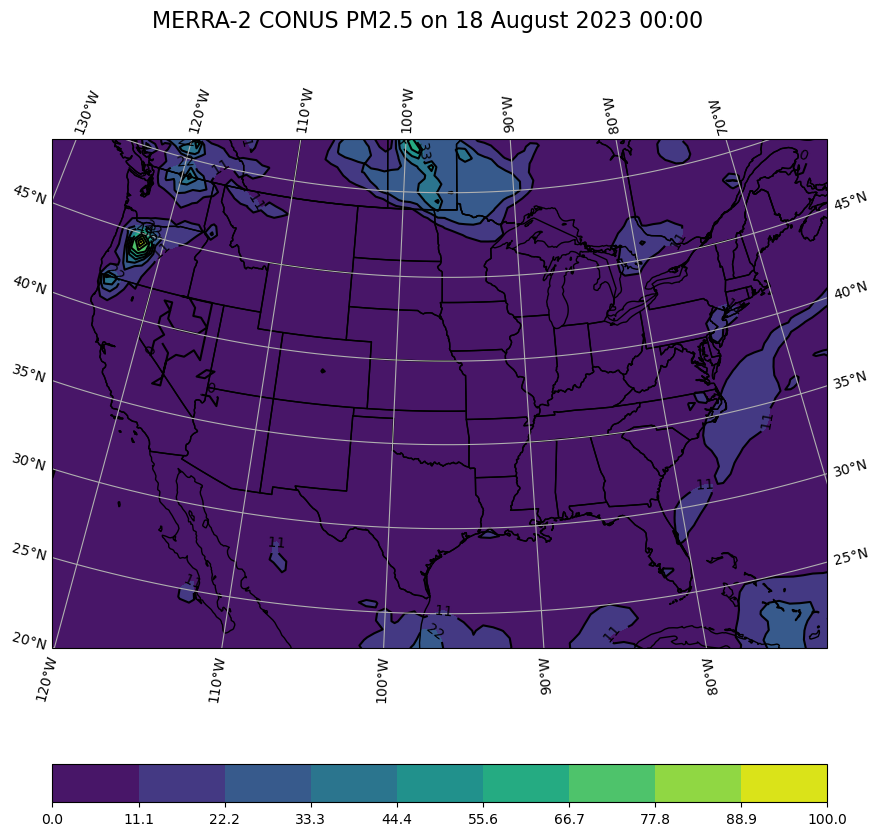

In [22]:
plt.rcParams['figure.figsize'] = 10,10

# Set up figure
fig = plt.figure()

ax = fig.add_subplot(111, projection=ccrs.LambertConformal())
ax.set_extent([-121, -72, 23, 51], crs=ccrs.PlateCarree()) # CONUS extent
ax.coastlines(resolution='50m')
ax.add_feature(cfeature.BORDERS)
ax.add_feature(cfeature.STATES)

# Set up filled and line contours
filled_c = ax.contourf(ds.lon, ds.lat, pm25, levels=np.linspace(0,100,10), 
                       transform=ccrs.PlateCarree())
line_c = ax.contour(ds.lon, ds.lat, pm25, levels=np.linspace(0,100,10),
                        colors=['black'],
                        transform=ccrs.PlateCarree())

# Lat/lon grid lines
ax.gridlines(draw_labels=True, dms=True, x_inline=False, y_inline=False)

# Set up labelling for contours
ax.clabel(line_c,  
    colors=['black'],
    manual=False,  
    inline=True,  
    fmt=' {:.0f} '.format,  
    )

# Set up colorbar and figure title
fig.colorbar(filled_c, orientation='horizontal')
fig.suptitle('MERRA-2 CONUS PM2.5 on 18 August 2023 00:00', fontsize=16)

plt.show()

In [23]:
ds = ds.rio.write_crs("EPSG:4326", inplace=True)
ds = ds.rio.set_spatial_dims(x_dim="lon", y_dim="lat", inplace=True)
print(ds.rio.crs)


EPSG:4326


In [24]:
ds_time_filtered = ds.sel(time=ds.time.dt.strftime('%H:%M:%S') == '12:30:00')
# Need to add Sunday filter

In [25]:
ds_time_filtered.time

<xarray.DataArray 'time' (time: 3)> Size: 24B
array(['2023-08-16T12:30:00.000000000', '2023-08-17T12:30:00.000000000',
       '2023-08-18T12:30:00.000000000'], dtype='datetime64[ns]')
Coordinates:
  * time         (time) datetime64[ns] 24B 2023-08-16T12:30:00 ... 2023-08-18...
    spatial_ref  int64 8B 0
Attributes:
    long_name:  time

In [26]:
# Filter spatial bounds
lon_min, lon_max = -140, -90
lat_min, lat_max = 35, 55
ds_filtered = ds_time_filtered.sel(lon=slice(lon_min, lon_max), lat=slice(lat_min, lat_max))
# Rough filtering to reduce data before reprojecting

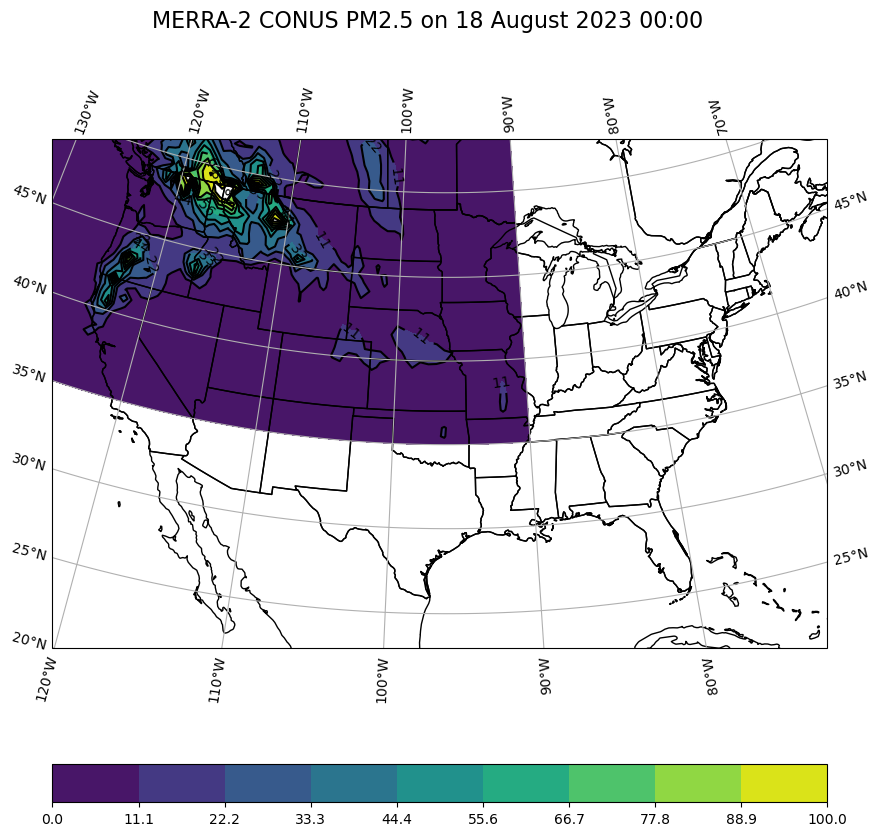

In [27]:
pm25 = ds_filtered.MERRA2_CNN_Surface_PM25[1, :, :].values
plt.rcParams['figure.figsize'] = 10,10

# Set up figure
fig = plt.figure()

ax = fig.add_subplot(111, projection=ccrs.LambertConformal())
ax.set_extent([-121, -72, 23, 51], crs=ccrs.PlateCarree()) # CONUS extent
ax.coastlines(resolution='50m')
ax.add_feature(cfeature.BORDERS)
ax.add_feature(cfeature.STATES)

# Set up filled and line contours
filled_c = ax.contourf(ds_filtered.lon, ds_filtered.lat, pm25, levels=np.linspace(0,100,10), 
                       transform=ccrs.PlateCarree())
line_c = ax.contour(ds_filtered.lon, ds_filtered.lat, pm25, levels=np.linspace(0,100,10),
                        colors=['black'],
                        transform=ccrs.PlateCarree())

# Lat/lon grid lines
ax.gridlines(draw_labels=True, dms=True, x_inline=False, y_inline=False)

# Set up labelling for contours
ax.clabel(line_c,  
    colors=['black'],
    manual=False,  
    inline=True,  
    fmt=' {:.0f} '.format,  
    )

# Set up colorbar and figure title
fig.colorbar(filled_c, orientation='horizontal')
fig.suptitle('MERRA-2 CONUS PM2.5 on 18 August 2023 00:00', fontsize=16)

plt.show()

In [28]:
ds_filtered.rio.crs

CRS.from_epsg(4326)

In [29]:
ds_filtered = ds_filtered.rio.set_spatial_dims(x_dim="lon", y_dim="lat", inplace=True)
print(ds.rio.crs)

EPSG:4326


In [30]:
from rasterio.enums import Resampling

In [36]:
crs_proj4 = "+proj=aea +lat_1=42 +lat_2=48 +lat_0=45 +lon_0=-115 +datum=WGS84 +units=m +no_defs"
x_min, x_max = -1500000, 1500000
y_min, y_max = -750000, 1000000

resolution = 5000 # meters

# Ensure bounds are divisible by the resolution
x_range = x_max - x_min
y_range = y_max - y_min

x_steps = x_range // resolution
y_steps = y_range // resolution

# Corrected bounds
x_max = x_min + (x_steps * resolution)
y_max = y_min + (y_steps * resolution)

dst_bounds = (x_min, x_max, y_min, y_max)
dst_bounds = (x_min, x_max, y_min, y_max)
ds_reprojected = ds_filtered.rio.reproject(
    crs_proj4,
    dst_bounds=dst_bounds,
    resolution=(resolution, resolution),
    resampling=Resampling.bilinear
)       


In [37]:
ds_reprojected

<xarray.Dataset> Size: 17MB
Dimensions:                  (x: 928, y: 503, time: 3)
Coordinates:
  * x                        (x) float64 7kB -2.307e+06 -2.302e+06 ... 2.328e+06
  * y                        (y) float64 4kB 1.386e+06 1.381e+06 ... -1.124e+06
  * time                     (time) datetime64[ns] 24B 2023-08-16T12:30:00 .....
    spatial_ref              int64 8B 0
Data variables:
    MERRA2_CNN_Surface_PM25  (time, y, x) float32 6MB nan nan nan ... nan nan
    QFLAG                    (time, y, x) float64 11MB nan nan nan ... nan nan
Attributes: (12/33)
    Comment:                           filename: MERRA2_HAQAST_CNN_L4_V1_2023...
    Filename:                          MERRA2_HAQAST_CNN_L4_V1_20230816.nc4
    Conventions:                       CF-1
    Institution:                       NASA Goddard Space Flight Center
    References:                        http://gmao.gsfc.nasa.gov ; https://do...
    Format:                            NetCDF-4/HDF-5
    ...                                ...
    RangeEndingDate:                   2023-08-16
    RangeEndingTime:                   23:59:59.000000
    DODS_EXTRA.Unlimited_Dimension:    time
    history:                           2023-04-21 04:24:38 GMT Hyrax-1.16.3 h...
    ProcessingLevel:                   4
    MapProjection:                     Geographic lat/lon. Datum: WGS-84

In [38]:

ds_reprojected = ds_reprojected.sel(x=slice(x_min, x_max), y=slice(y_max, y_min))
ds_reprojected = ds_reprojected.rio.write_crs(crs_proj4, inplace=True)

In [39]:
ds_reprojected.MERRA2_CNN_Surface_PM25.shape[1:3]

(350, 600)

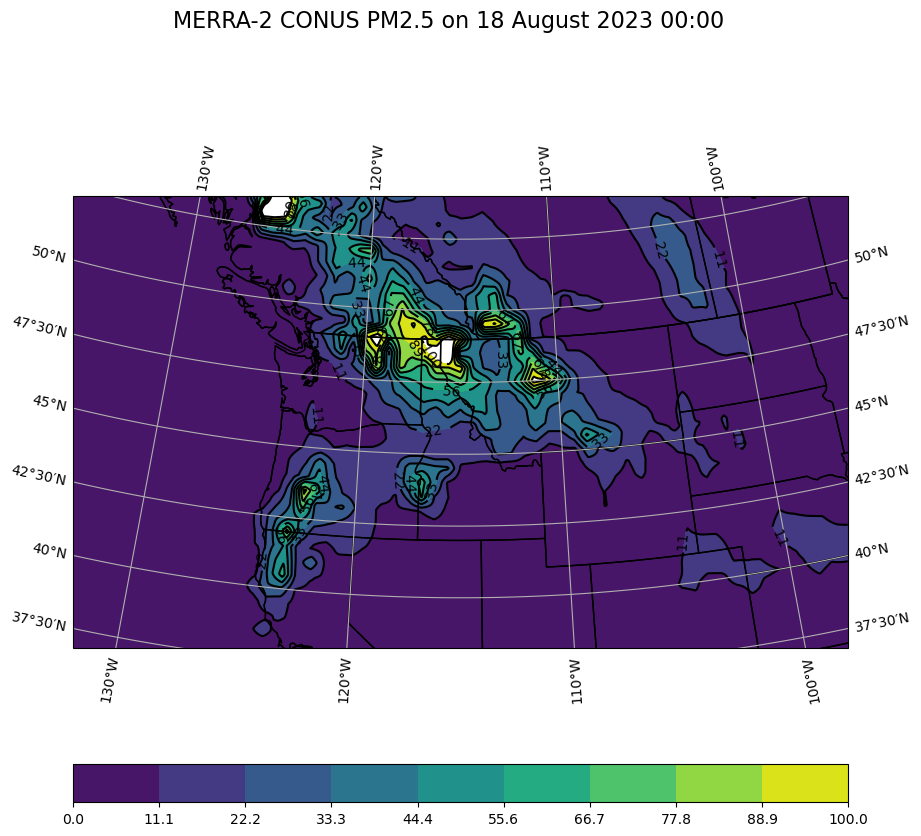

In [40]:
pm25 = ds_reprojected.MERRA2_CNN_Surface_PM25[1, :, :].values
plt.rcParams['figure.figsize'] = 10,10

import cartopy.crs as ccrs

# Define the CRS in Cartopy
crs_proj4 = ccrs.AlbersEqualArea(
    central_longitude=-115,  # Central meridian
    central_latitude=45,     # Latitude of origin
    standard_parallels=(42, 48)  # Standard parallels
)

# Set up figure
fig = plt.figure()

ax = fig.add_subplot(111, projection=crs_proj4)
ax.set_extent([x_min, x_max, y_min, y_max], crs=crs_proj4) # CONUS extent
ax.coastlines(resolution='50m')
ax.add_feature(cfeature.BORDERS)
ax.add_feature(cfeature.STATES)

# Set up filled and line contours
filled_c = ax.contourf(ds_reprojected.x, ds_reprojected.y, pm25, levels=np.linspace(0,100,10), 
                       transform=crs_proj4)
line_c = ax.contour(ds_reprojected.x, ds_reprojected.y, pm25, levels=np.linspace(0,100,10),
                        colors=['black'],
                        transform=crs_proj4)

# Lat/lon grid lines
ax.gridlines(draw_labels=True, dms=True, x_inline=False, y_inline=False)

# Set up labelling for contours
ax.clabel(line_c,  
    colors=['black'],
    manual=False,  
    inline=True,  
    fmt=' {:.0f} '.format,  
    )

# Set up colorbar and figure title
fig.colorbar(filled_c, orientation='horizontal')
fig.suptitle('MERRA-2 CONUS PM2.5 on 18 August 2023 00:00', fontsize=16)

plt.show()

In [41]:
# Fire vector data
viirs = Path("../Assignment 3/Data/DL_FIRE_J1V-C2_512898/fire_nrt_J1V-C2_512898.shp")
viirs.exists()

True

In [42]:
from pathlib import Path

In [43]:
import geopandas as gpd

In [44]:
lon_min, lon_max = -140, -90
lat_min, lat_max = 35, 55
viirs_data = gpd.read_file(viirs, bbox=(lon_min,lat_min,lon_max,lat_max))

In [45]:
# find unique values of ACQ_DATE
viirs_data.ACQ_DATE.unique()

<DatetimeArray>
['2022-01-01 00:00:00', '2022-01-02 00:00:00', '2022-01-03 00:00:00',
 '2022-01-04 00:00:00', '2022-01-05 00:00:00', '2022-01-06 00:00:00',
 '2022-01-07 00:00:00', '2022-01-08 00:00:00', '2022-01-09 00:00:00',
 '2022-01-10 00:00:00',
 ...
 '2022-12-22 00:00:00', '2022-12-23 00:00:00', '2022-12-24 00:00:00',
 '2022-12-25 00:00:00', '2022-12-26 00:00:00', '2022-12-27 00:00:00',
 '2022-12-28 00:00:00', '2022-12-29 00:00:00', '2022-12-30 00:00:00',
 '2022-12-31 00:00:00']
Length: 365, dtype: datetime64[ms]

In [46]:
filter = (viirs_data.ACQ_DATE >= '2022-08-15') & (viirs_data.ACQ_DATE < '2022-09-11')
filter = filter & (viirs_data.LATITUDE >= lat_min) & (viirs_data.LATITUDE <= lat_max)
filter = filter & (viirs_data.LONGITUDE >= lon_min) & (viirs_data.LONGITUDE <= lon_max)
# note we're filtering on the original lat/lon in original crs, the geometry column is the new crs
# how many points are there in the 2 weeks before the 1st of Sep 2022

# Now that I've added the bbox filtering to the viirs loading we shouldn't need the above, but keeping just in case

viirs_data[filter].shape

(62574, 15)

In [47]:
filtered_viirs = viirs_data[filter].to_crs(crs_proj4)

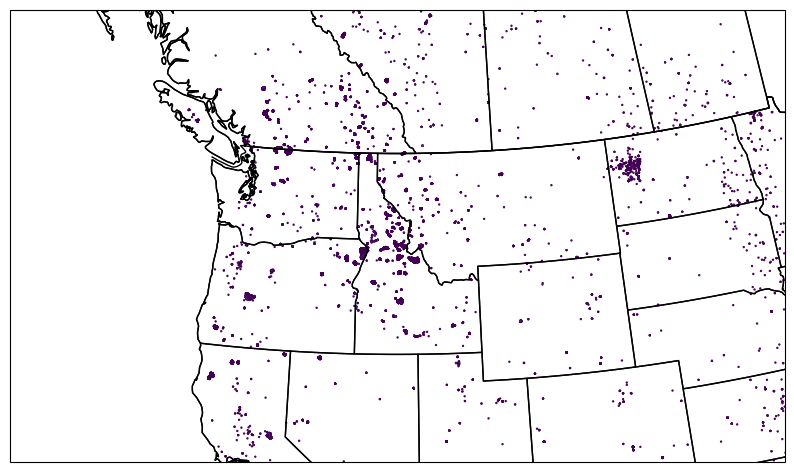

In [48]:
# basic plot to see where fires are, weighting the points by frp, lowering the size of each point to be smaller, adding coastlines and borders
#viirs_data[filter].plot(column='FRP', markersize=0.1)
plt.rcParams['figure.figsize'] = 10,10
# Set up figure
fig = plt.figure()

ax = fig.add_subplot(111, projection=crs_proj4)
ax.set_extent([x_min, x_max, y_min, y_max], crs=crs_proj4) # CONUS extent
ax.coastlines(resolution='50m')
ax.add_feature(cfeature.BORDERS)
ax.add_feature(cfeature.STATES)

# add points from viirs data
filtered_viirs.plot(ax=ax, column='FRP', markersize=0.5)

plt.show()

In [49]:
min(filtered_viirs.geometry.x.values), max(filtered_viirs.geometry.x.values),min(filtered_viirs.geometry.y.values), max(filtered_viirs.geometry.y.values)

(np.float64(-808873.4652620858),
 np.float64(2262903.4122539493),
 np.float64(-1086981.7910088904),
 np.float64(1281878.7074925345))

In [50]:
weights = filtered_viirs['FRP'].values
x = filtered_viirs.geometry.x.values
y = filtered_viirs.geometry.y.values


In [51]:
y

array([837335.42450997, 571422.49563849, 571351.5367045 , ...,
       730362.7631988 , 730810.04878307, 730746.31839243])

In [52]:
# First do the analysis without weighting by FRP, to verify the fire locations with the above plot
heatmap, xedges, yedges = np.histogram2d(y, x, bins=list(ds_reprojected.MERRA2_CNN_Surface_PM25.shape[1:3]), range=[[y_min, y_max], [x_min, x_max]])#, weights=weights)

# flip y axis to match the image (required debugging to see I needed to do this)
heatmap = np.flipud(heatmap)

In [53]:
heatmap.shape

(350, 600)

(array([1.143e+03, 1.270e+02, 5.900e+01, 4.000e+01, 3.500e+01, 3.000e+01,
        2.700e+01, 2.500e+01, 1.600e+01, 1.500e+01, 1.100e+01, 1.400e+01,
        1.800e+01, 1.000e+01, 1.500e+01, 5.000e+00, 1.100e+01, 7.000e+00,
        8.000e+00, 9.000e+00, 6.000e+00, 6.000e+00, 5.000e+00, 6.000e+00,
        5.000e+00, 1.100e+01, 4.000e+00, 4.000e+00, 5.000e+00, 4.000e+00,
        4.000e+00, 4.000e+00, 2.000e+00, 4.000e+00, 0.000e+00, 2.000e+00,
        4.000e+00, 3.000e+00, 3.000e+00, 3.000e+00, 1.000e+00, 1.000e+00,
        8.000e+00, 2.000e+00, 8.000e+00, 2.000e+00, 2.000e+00, 3.000e+00,
        0.000e+00, 0.000e+00, 3.000e+00, 0.000e+00, 1.000e+00, 1.000e+00,
        4.000e+00, 1.000e+00, 0.000e+00, 1.000e+00, 1.000e+00, 0.000e+00,
        1.000e+00, 1.000e+00, 0.000e+00, 1.000e+00, 0.000e+00, 1.000e+00,
        2.000e+00, 0.000e+00, 2.000e+00, 0.000e+00, 0.000e+00, 1.000e+00,
        1.000e+00, 0.000e+00, 1.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 0.000e+0

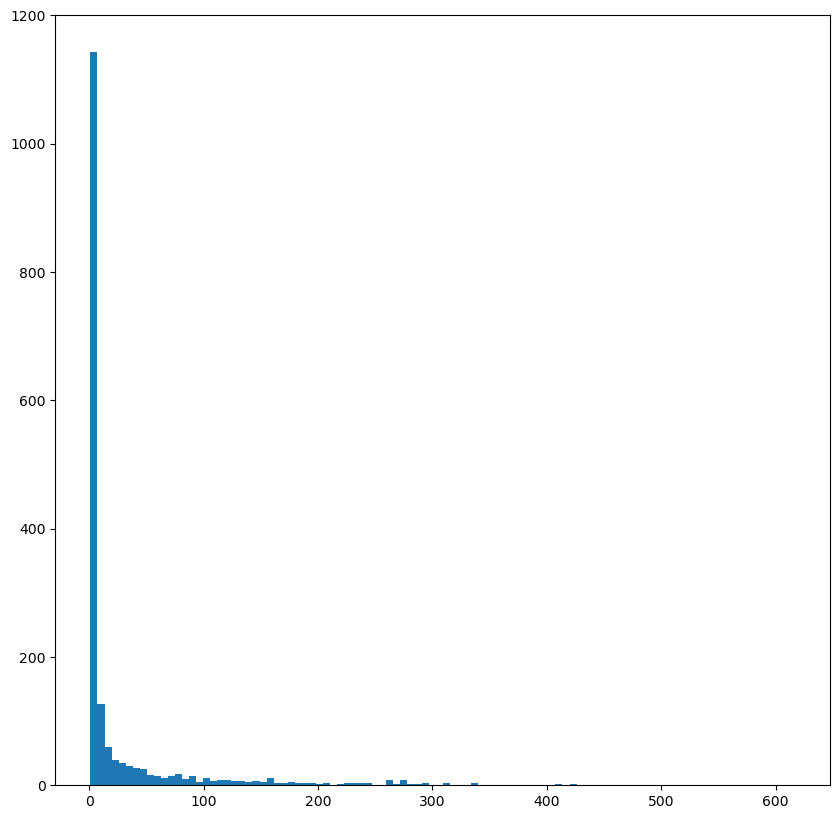

In [54]:
# check distribution of heatmap, ignoring zeros
plt.hist(heatmap[heatmap > 0].flatten(), bins=100)

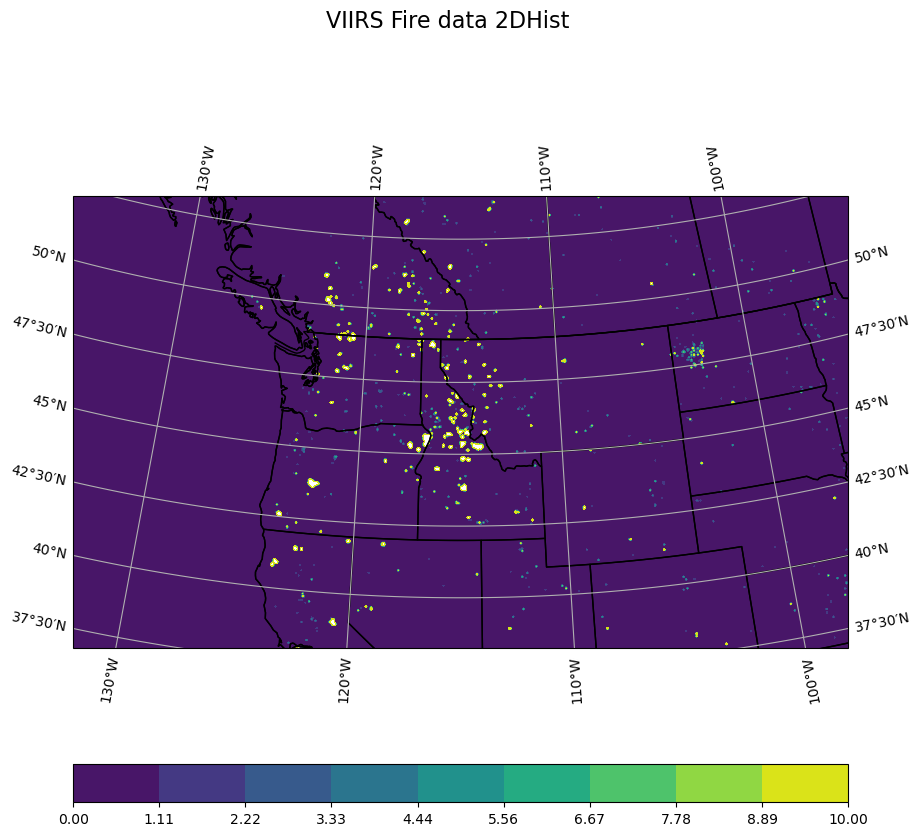

In [55]:
plt.rcParams['figure.figsize'] = 10,10

# Set up figure
fig = plt.figure()

ax = fig.add_subplot(111, projection=crs_proj4)
ax.set_extent([x_min, x_max, y_min, y_max], crs=crs_proj4) # CONUS extent
ax.coastlines(resolution='50m')
ax.add_feature(cfeature.BORDERS)
ax.add_feature(cfeature.STATES)

# Set up filled and line contours
filled_c = ax.contourf(ds_reprojected.x, ds_reprojected.y, heatmap, levels=np.linspace(0,10,10), 
                       transform=crs_proj4)

# Lat/lon grid lines
ax.gridlines(draw_labels=True, dms=True, x_inline=False, y_inline=False)


# Set up colorbar and figure title
fig.colorbar(filled_c, orientation='horizontal')
fig.suptitle('VIIRS Fire data 2DHist', fontsize=16)

plt.show()

(array([1.393e+03, 9.000e+01, 5.200e+01, 4.700e+01, 2.400e+01, 2.400e+01,
        1.200e+01, 1.000e+01, 1.300e+01, 1.300e+01, 6.000e+00, 1.000e+01,
        4.000e+00, 8.000e+00, 6.000e+00, 5.000e+00, 8.000e+00, 2.000e+00,
        4.000e+00, 3.000e+00, 3.000e+00, 0.000e+00, 6.000e+00, 2.000e+00,
        0.000e+00, 3.000e+00, 4.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        2.000e+00, 1.000e+00, 2.000e+00, 1.000e+00, 1.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 1.000e+00, 1.000e+00, 0.000e+00, 1.000e+00,
        0.000e+00, 0.000e+00, 0.000e+00, 1.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 1.000e+00, 0.000e+00, 1.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 0.000e+0

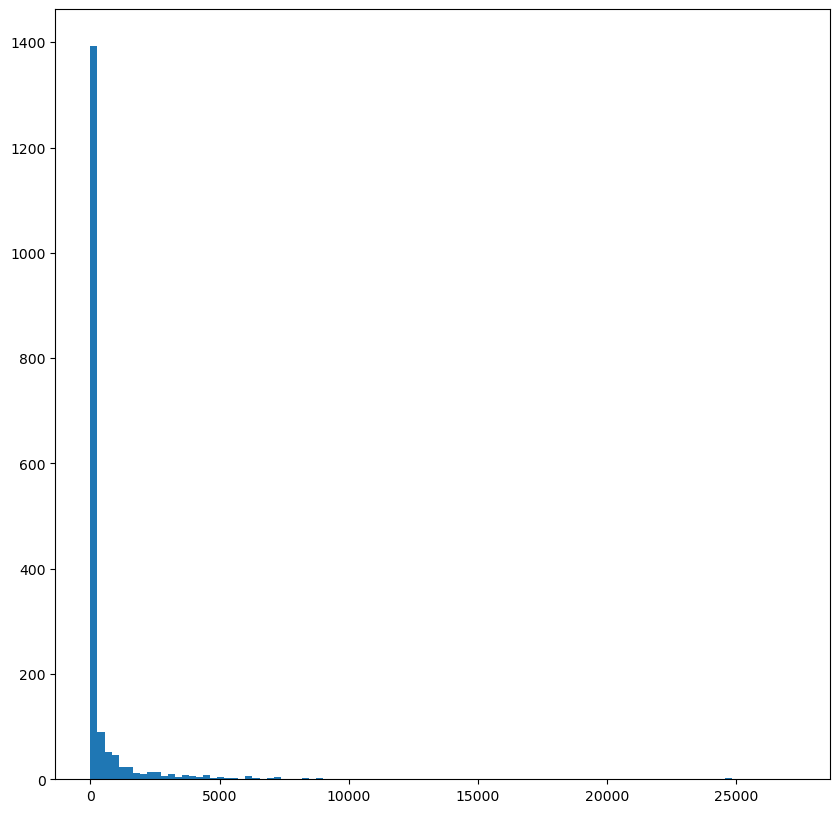

In [56]:
# now add the FRP weights to the heatmap, since we've proved we've place the fires on the right points with the 2d histogram
heatmap, xedges, yedges = np.histogram2d(y, x, bins=list(ds_reprojected.MERRA2_CNN_Surface_PM25.shape[1:3]), range=[[y_min, y_max], [x_min, x_max]], weights=weights)
heatmap = np.flipud(heatmap)
# check distribution of heatmap, ignoring zeros
plt.hist(heatmap[heatmap > 0].flatten(), bins=100)

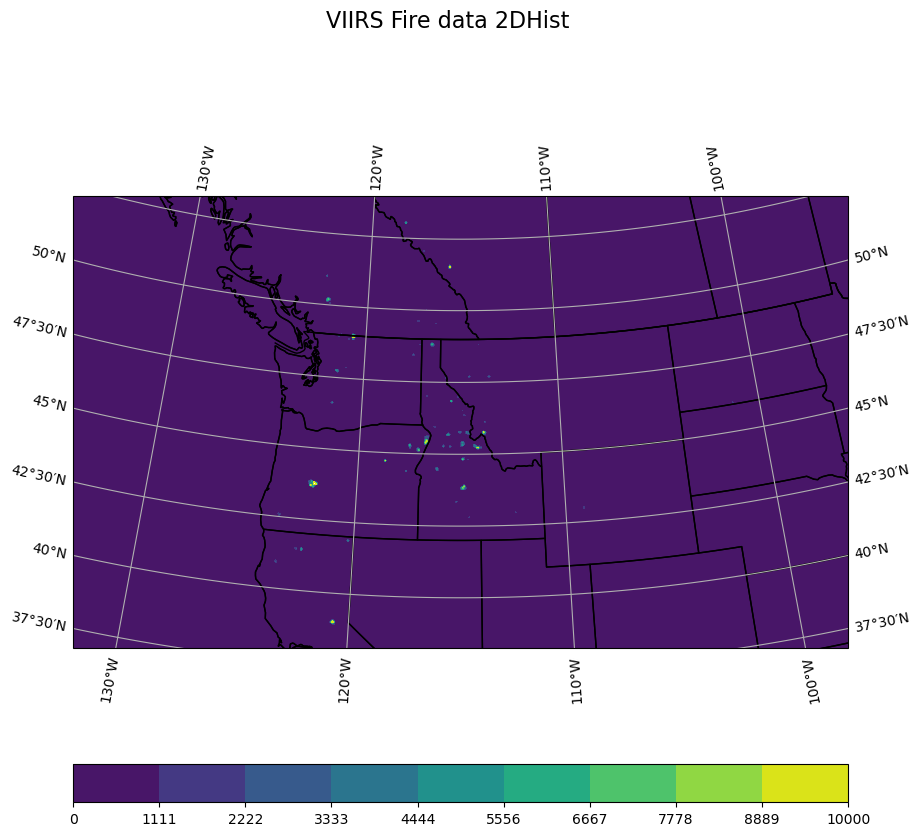

In [64]:
plt.rcParams['figure.figsize'] = 10,10

# Set up figure
fig = plt.figure()

ax = fig.add_subplot(111, projection=crs_proj4)
ax.set_extent([x_min, x_max, y_min, y_max], crs=crs_proj4) # CONUS extent
ax.coastlines(resolution='50m')
ax.add_feature(cfeature.BORDERS)
ax.add_feature(cfeature.STATES)

# Set up filled and line contours
filled_c = ax.contourf(ds_reprojected.x, ds_reprojected.y, heatmap, levels=np.linspace(0,10000,10), 
                       transform=crs_proj4)

# Lat/lon grid lines
ax.gridlines(draw_labels=True, dms=True, x_inline=False, y_inline=False)


# Set up colorbar and figure title
fig.colorbar(filled_c, orientation='horizontal')
fig.suptitle('VIIRS Fire data 2DHist', fontsize=16)

plt.show()

In [65]:
# Now let's apply the smoothing
bandwidth = 50_000 # meters

# Compute the standard deviation in terms of grid cells
sigma = bandwidth / resolution


1276.26


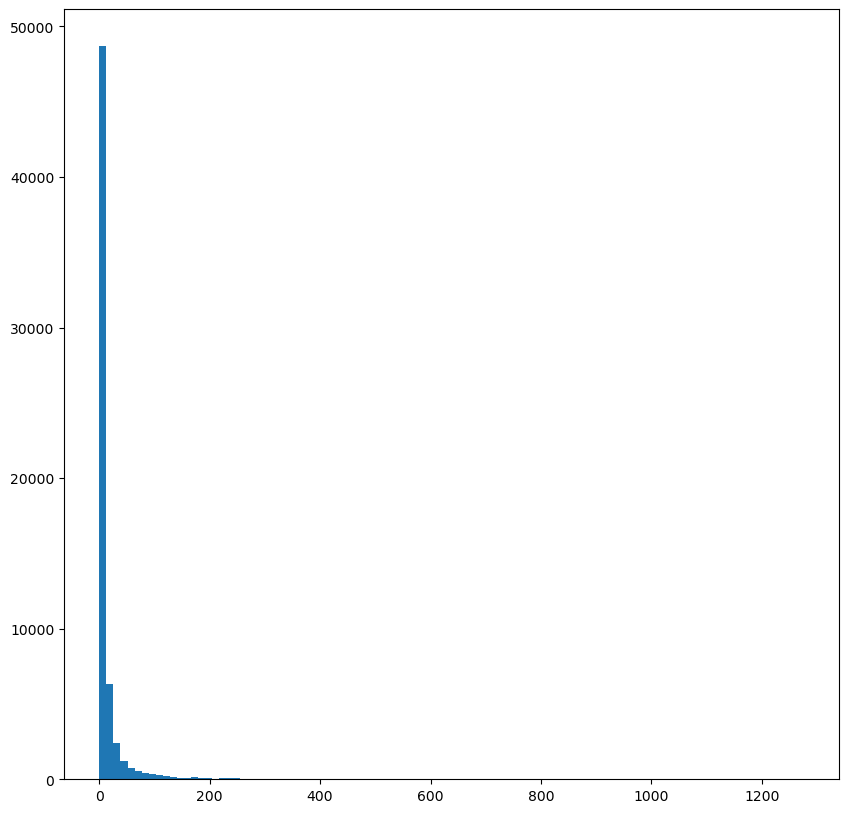

In [66]:
# check distribution of weights, ignoring zeros
plt.hist(weights[weights > 0].flatten(), bins=100)
print(max(weights))

In [67]:
from scipy.signal import fftconvolve

def gaussian_kernel(sigma):
    """Creates an anisotropic Gaussian kernel."""
    # Define kernel sizes
    kernel_size = int(6 * sigma)
    x = np.linspace(-kernel_size // 2, kernel_size // 2, kernel_size)
    y = np.linspace(-kernel_size // 2, kernel_size // 2, kernel_size)
    x, y = np.meshgrid(x, y)
    kernel = np.exp(-(x**2 / (2 * sigma**2) + y**2 / (2 * sigma**2)))
    return kernel

# Create the kernel
kernel = gaussian_kernel(sigma)

# Perform convolution
smoothed_heatmap = fftconvolve(heatmap, kernel, mode='same')


(array([1.47791e+05, 7.75800e+03, 4.94000e+03, 3.14200e+03, 2.42800e+03,
        2.00800e+03, 1.44500e+03, 1.12600e+03, 9.60000e+02, 8.34000e+02,
        7.20000e+02, 6.32000e+02, 5.41000e+02, 4.87000e+02, 4.32000e+02,
        4.23000e+02, 3.49000e+02, 3.05000e+02, 2.78000e+02, 2.87000e+02,
        2.48000e+02, 2.60000e+02, 2.25000e+02, 2.18000e+02, 1.86000e+02,
        2.16000e+02, 1.80000e+02, 1.91000e+02, 1.58000e+02, 1.59000e+02,
        1.59000e+02, 1.41000e+02, 1.26000e+02, 1.14000e+02, 1.00000e+02,
        9.00000e+01, 9.90000e+01, 7.60000e+01, 1.02000e+02, 7.60000e+01,
        9.00000e+01, 8.20000e+01, 8.50000e+01, 8.60000e+01, 8.30000e+01,
        8.70000e+01, 9.70000e+01, 9.10000e+01, 8.60000e+01, 8.30000e+01,
        5.80000e+01, 6.00000e+01, 5.20000e+01, 6.00000e+01, 5.70000e+01,
        5.30000e+01, 4.30000e+01, 5.10000e+01, 4.60000e+01, 5.20000e+01,
        4.40000e+01, 3.10000e+01, 2.00000e+01, 2.30000e+01, 2.20000e+01,
        2.30000e+01, 2.60000e+01, 2.40000e+01, 1.50

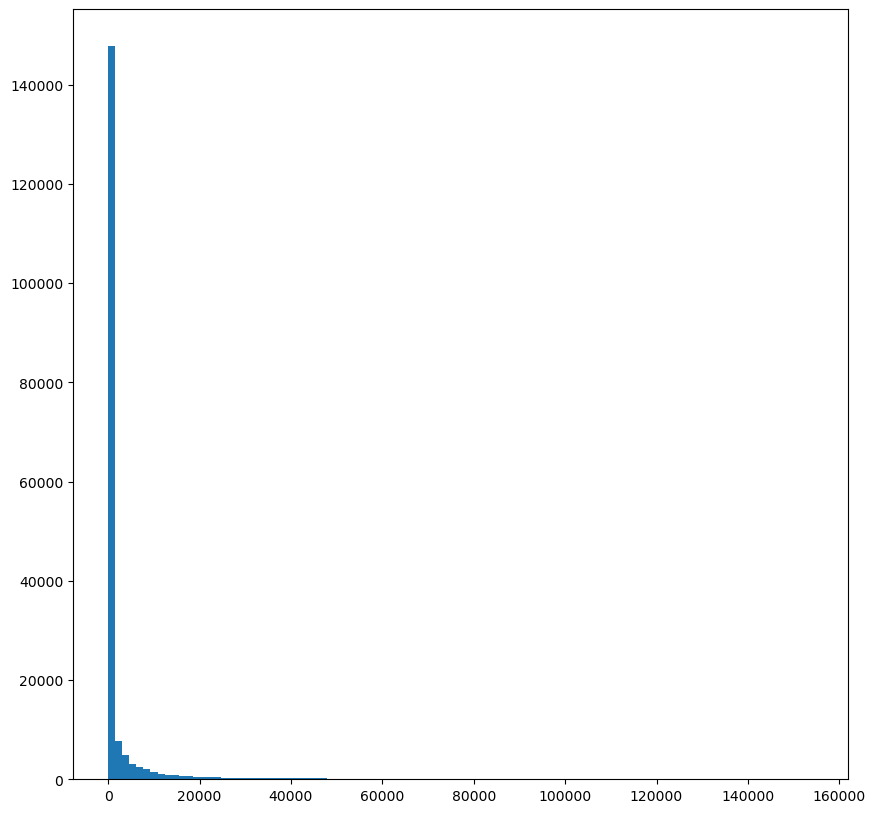

In [68]:
# get distribution of smooth_heatmap
plt.hist(smoothed_heatmap[smoothed_heatmap > 0].flatten(), bins=100)

In [69]:
# Set values lower than zero to zero
smoothed_heatmap[smoothed_heatmap < 0] = 0.0

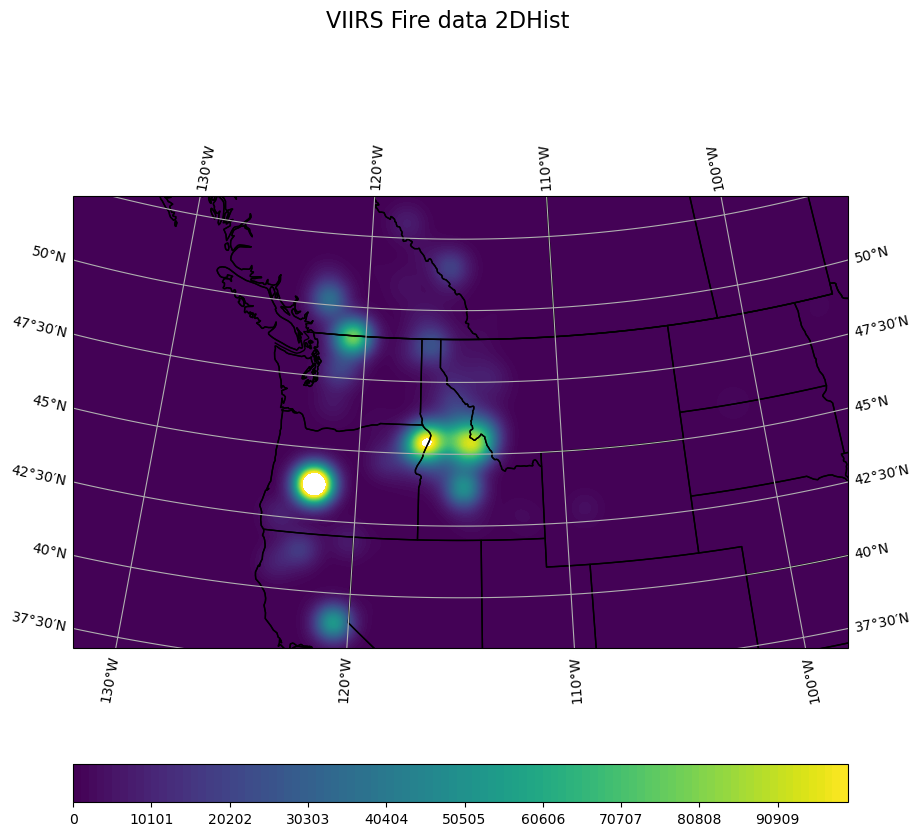

In [70]:
plt.rcParams['figure.figsize'] = 10,10

# Set up figure
fig = plt.figure()

ax = fig.add_subplot(111, projection=crs_proj4)
ax.set_extent([x_min, x_max, y_min, y_max], crs=crs_proj4) # CONUS extent
ax.coastlines(resolution='50m')
ax.add_feature(cfeature.BORDERS)
ax.add_feature(cfeature.STATES)

# Set up filled and line contours
filled_c = ax.contourf(ds_reprojected.x, ds_reprojected.y, smoothed_heatmap, levels=np.linspace(0,100_000,100), 
                       transform=crs_proj4)

# Lat/lon grid lines
ax.gridlines(draw_labels=True, dms=True, x_inline=False, y_inline=False)


# Set up colorbar and figure title
fig.colorbar(filled_c, orientation='horizontal')
fig.suptitle('VIIRS Fire data 2DHist', fontsize=16)

plt.show()

In [156]:
# check for nans in heatmap and smoothed heatmap
np.isnan(heatmap).sum(), np.isnan(smoothed_heatmap).sum()

(np.int64(0), np.int64(0))

In [161]:
# check for infs
np.isinf(heatmap).sum(), np.isinf(smoothed_heatmap).sum()

(np.int64(0), np.int64(0))

In [162]:
smoothed_heatmap

array([[-1.36747282e-12, -1.76197544e-12, -1.31841550e-12, ...,
         2.95978206e+00,  2.91559118e+00,  2.87107645e+00],
       [-9.52529646e-13, -8.44194729e-13, -7.41991977e-13, ...,
         3.04318798e+00,  2.99778411e+00,  2.95204829e+00],
       [-2.64909532e-12, -2.58164151e-12, -2.45695415e-12, ...,
         3.12873361e+00,  3.08208375e+00,  3.03509371e+00],
       ...,
       [-2.45286604e-13, -2.45286604e-13, -1.88053063e-13, ...,
         7.84917133e-13,  8.42150674e-13,  8.70767444e-13],
       [ 8.01269573e-13,  8.50326894e-13,  6.94978711e-13, ...,
         4.32726451e-12,  4.31704423e-12,  4.36916763e-12],
       [ 1.06290862e-13,  1.79876843e-13,  1.14467082e-13, ...,
         1.11400999e-12,  1.13751663e-12,  1.09663553e-12]])

In [167]:
type(smoothed_heatmap)

numpy.ndarray

In [169]:
smoothed_heatmap[0:175,0:300]

array([[-1.36747282e-12, -1.76197544e-12, -1.31841550e-12, ...,
        -4.70950280e-12, -5.23278089e-12, -4.70950280e-12],
       [-9.52529646e-13, -8.44194729e-13, -7.41991977e-13, ...,
        -2.61639044e-13, -2.61639044e-13, -5.23278089e-13],
       [-2.64909532e-12, -2.58164151e-12, -2.45695415e-12, ...,
        -2.61639044e-13,  0.00000000e+00,  2.61639044e-13],
       ...,
       [-9.56617756e-13, -8.83031774e-13, -2.53462824e-13, ...,
        -6.27933706e-12, -3.13966853e-12, -6.27933706e-12],
       [-1.06290862e-12, -1.15693515e-12, -1.74562300e-12, ...,
        -2.09311235e-12, -2.09311235e-12, -3.13966853e-12],
       [-1.76197544e-12, -5.92775960e-13,  8.99384215e-14, ...,
        -2.09311235e-12, -2.09311235e-12, -4.18622471e-12]])